In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from itertools import product

In [2]:
ADMIN1_LIST = [
    'Trans Nzoia', 'Bungoma', 'Uasin Gishu', 'Nandi', 'Kakamega', 'Kisii','Nakuru', 'Siaya', 'Migori', 
    'Narok', 'Nyamira', 'Meru', 'Kericho','Bomet',
    'Makueni'
]
with open("cultivars_list.txt", "r") as f:
    lines = f.readlines()
cultivars = [l[:6] for l in lines[1:]]

In [3]:
df = pd.DataFrame()
df_list = []
for year in range(2018, 2023):
    print(year)
    iterable = product(ADMIN1_LIST, cultivars)
    for admin1, cultivar in iterable:
        tmp_df = pd.read_csv(f"cultivar_results/{admin1}_{year}_{cultivar}.csv")
        tmp_df["year"] = year
        tmp_df["cultivar"] = cultivar
        tmp_df["admin1"] = admin1
        df_list.append(tmp_df)
df = pd.concat(df_list, ignore_index=True)

2018
2019
2020
2021
2022


In [4]:
df.year.unique()

array([2018, 2019, 2020, 2021, 2022])

In [5]:
df.head()

,FLO,MAT,TOPWT,HARWT,RAIN,TIRR,CET,PESW,TNUP,TNLF,TSON,TSOC,year,cultivar,admin1
0,125.0,269.0,17384,9776,NaN,0,NaN,NaN,0,NaN,0,218,2018,PC0001,Trans Nzoia
1,76.0,166.0,16207,10031,NaN,0,NaN,NaN,0,NaN,0,189,2018,PC0001,Trans Nzoia
2,76.0,161.0,16056,9781,NaN,0,NaN,NaN,0,NaN,0,157,2018,PC0001,Trans Nzoia
3,69.0,146.0,16061,9431,NaN,0,NaN,NaN,0,NaN,0,151,2018,PC0001,Trans Nzoia
4,72.0,151.0,15528,9115,NaN,0,NaN,NaN,0,NaN,0,158,2018,PC0001,Trans Nzoia


In [6]:
df.groupby("admin1").MAT.describe()

,count,mean,std,min,25%,50%,75%,max
admin1,,,,,,,,
Bomet,19625.0,166.354599,32.779552,82.0,143.0,161.0,184.0,300.0
Bungoma,21195.0,134.830479,20.592850,77.0,120.0,133.0,148.0,212.0
Kakamega,25905.0,136.612546,22.112608,78.0,120.0,135.0,151.0,228.0
Kericho,20173.0,185.324890,46.572917,87.0,149.0,175.0,215.0,316.0
Kisii,10990.0,146.735305,21.588759,84.0,131.0,145.0,161.0,216.0
Makueni,39250.0,118.215516,23.430897,64.0,101.0,115.0,132.0,218.0
Meru,36216.0,130.789320,45.674105,57.0,100.0,119.0,148.0,316.0
Migori,25905.0,121.134762,15.783269,75.0,110.0,120.0,132.0,178.0
Nakuru,36595.0,195.797759,51.304215,79.0,155.0,186.0,232.0,316.0


In [7]:
df.groupby("admin1").HARWT.describe()

,count,mean,std,min,25%,50%,75%,max
admin1,,,,,,,,
Bomet,19625.0,11245.614573,4066.012301,2043.0,8707.00,11500.0,13797.00,26711.0
Bungoma,21195.0,9952.443076,3597.992004,1609.0,7734.00,10123.0,12209.50,25150.0
Kakamega,25905.0,10021.506157,3686.180895,1650.0,7765.00,10145.0,12304.00,25150.0
Kericho,20410.0,11573.464331,4245.780705,1886.0,8948.00,11773.5,14193.00,28542.0
Kisii,10990.0,10046.376251,3629.612785,1685.0,7811.00,10266.5,12346.50,23143.0
Makueni,39250.0,7676.307924,2915.976906,1052.0,5837.00,7669.0,9474.75,21668.0
Meru,39250.0,8462.770420,4533.438415,0.0,5547.25,8424.0,11356.00,28342.0
Migori,25905.0,8463.367033,3003.798908,1406.0,6598.00,8627.0,10351.00,19014.0
Nakuru,39250.0,11834.575771,4490.837911,0.0,9017.00,11981.0,14629.00,29419.0


/tmp/ipykernel_995898/1096754576.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


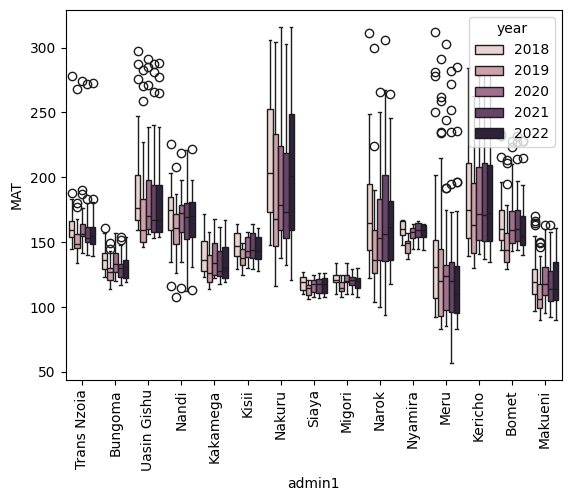

In [8]:
ax = sns.boxplot(
    df.loc[df.cultivar == "990002"],
    x="admin1",
    y="MAT",
    hue="year"
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [9]:
df_cultivars = df.groupby("cultivar")[["FLO", "MAT", "HARWT"]].median()
df_cultivars["harvested"] = df.groupby("cultivar").MAT.agg({lambda x: x.count()/x.__len__()})

In [10]:
df_cultivars.HARWT.describe()

count      156.000000
mean     10237.653846
std       3577.118436
min       2128.000000
25%       8162.000000
50%      10348.500000
75%      12555.500000
max      19649.000000
Name: HARWT, dtype: float64

In [11]:
df_cultivars.sort_values(by="HARWT").head(10)

,FLO,MAT,HARWT,harvested
cultivar,,,,
IB0155,62.0,106.0,2128.0,0.993483
KY0009,81.0,140.0,2635.0,0.986558
KY0006,70.0,116.0,2786.0,0.993890
KY0017,71.0,107.0,2948.0,0.993483
KA0001,71.0,139.0,2993.0,0.990224
IB0071,66.0,130.0,3316.0,0.991853
KY0004,81.0,139.0,3460.0,0.986151
KY0013,132.0,169.0,3535.0,0.951527
KY0002,106.0,155.0,3664.0,0.975560


In [12]:
df_cultivars.loc[df.groupby("cultivar").MAT.quantile(.5) < 130]

,FLO,MAT,HARWT,harvested
cultivar,,,,
990003,52.0,114.0,6337.0,0.994297
990004,36.0,92.0,3857.0,0.996334
AC0001,68.0,126.0,3694.0,0.990224
IB0001,52.0,115.0,7040.0,0.992261
IB0002,51.0,114.0,9776.0,0.993075
IB0003,52.0,115.0,10105.0,0.993483
IB0004,52.0,116.0,10150.0,0.993890
IB0005,56.0,119.0,9959.0,0.992668
IB0006,54.0,117.0,10632.0,0.993890


In [13]:
df_cultivars.loc[df_cultivars.harvested > .90].index

Index(['990001', '990002', '990003', '990004', 'AC0001', 'EM0001', 'GH0010',
       'IB0001', 'IB0002', 'IB0003',
       ...
       'LL0599', 'LL0661', 'LL0674', 'PC0001', 'PC0002', 'PC0003', 'PC0004',
       'PC0005', 'ZA0001', 'ZA0002'],
      dtype='object', name='cultivar', length=156)

In [14]:
df_cultivars.index

Index(['990001', '990002', '990003', '990004', 'AC0001', 'EM0001', 'GH0010',
       'IB0001', 'IB0002', 'IB0003',
       ...
       'LL0599', 'LL0661', 'LL0674', 'PC0001', 'PC0002', 'PC0003', 'PC0004',
       'PC0005', 'ZA0001', 'ZA0002'],
      dtype='object', name='cultivar', length=156)

<Axes: xlabel='MAT', ylabel='cultivar'>

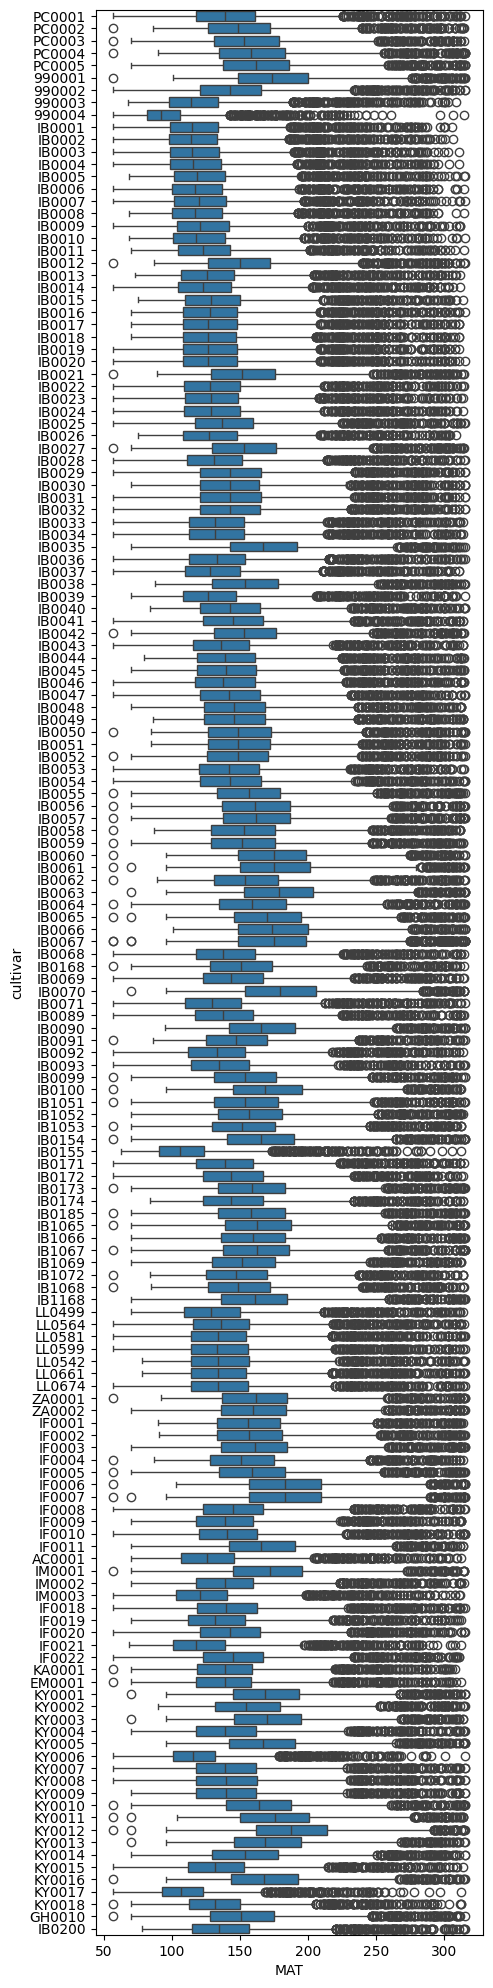

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 25))
sns.boxplot(
    df,
    y="cultivar",
    x="MAT"
)

In [16]:
df.groupby("cultivar").MAT.count().describe()

count     156.000000
mean     2417.282051
std       183.186836
min      2297.000000
25%      2387.000000
50%      2412.000000
75%      2431.000000
max      4652.000000
Name: MAT, dtype: float64

In [18]:
SELECTED_CULTIVARS = [
    'KY0013', 'KY0011', 'IF0011', 'KY0014', 'KY0002', 'KY0003',
    'KY0015', 'IF0007', 'IB0067', 'EM0001'
]
df_cultivars.loc[SELECTED_CULTIVARS]

,FLO,MAT,HARWT,harvested
cultivar,,,,
KY0013,132.0,169.0,3535.0,0.951527
KY0011,120.0,176.0,9785.0,0.951120
IF0011,88.0,166.0,15313.0,0.954379
KY0014,91.0,154.0,4969.0,0.975560
KY0002,106.0,155.0,3664.0,0.975560
KY0003,114.0,170.0,4437.0,0.953564
KY0015,90.0,132.0,3913.0,0.990224
IF0007,106.0,183.0,13760.0,0.942974
IB0067,89.0,175.0,9253.0,0.947454
